# Data Report

## Question
How does urban green infrastructure (urban green space and urban tree cover) impact the average share of built-up areas that is open space for public use and the average share of the urban population with convenient access to these spaces?

## Data Sources
### SDG Data
- **Source:** United Nations Statistics Division (UNSD)
- **Description:** This dataset includes information on the average share of built-up areas of cities that is open space for public use and the average share of the urban population with convenient access to these spaces.
- **Structure and Quality:** The data is structured with columns representing various metrics such as city name, country code, share of built-up area that is open space, and share of urban population with access to public spaces. The data is generally well-structured and complete, although some columns may contain missing values or inconsistent formatting.
- **License:** The data is provided under the Open Data Commons Open Database License (ODbL). We will follow the obligations by attributing the source and ensuring that any shared data maintains the same license.

### Green Infrastructure Data
- **Source:** European Environment Agency (EEA)
- **Description:** This dataset includes information on total green infrastructure, urban green space, and urban tree cover for various cities in Europe.
- **Structure and Quality:** The data is structured with columns for city name, total green infrastructure, urban green space, and urban tree cover. The data is generally well-structured, with clearly defined metrics.
- **License:** The data is available under the Creative Commons Attribution 4.0 International (CC BY 4.0) license. We will attribute the source appropriately and share any derived works under the same license.

## Data Pipeline
### Technology
- **Tools Used:** Python, Pandas, SQLite, Seaborn, Matplotlib, Requests
- **Environment:** Jupyter Notebook for interactive data exploration and analysis

### Transformation and Cleaning Steps
1. **Download Data:** Used the `requests` library to download the data files from the provided URLs.
2. **Load Data:** Loaded the downloaded data files into pandas DataFrames using `pd.read_excel` for the Excel file and `pd.read_csv` for the CSV file.
3. **Transform Data:** Standardized the column names by stripping spaces, replacing special characters, and converting to lowercase.
4. **Save to SQLite:** Saved the transformed DataFrames to an SQLite database using the `to_sql` method.
5. **Standardize Location Columns:** Standardized the `city_name` columns in both DataFrames for consistency and to facilitate merging.
6. **Merge DataFrames:** Merged the SDG and green infrastructure DataFrames on the `city_name` column.

### Problems Encountered and Solutions
- **File Not Found:** Initially encountered issues with file paths. Solved by downloading the files directly from the internet.
- **Column Name Inconsistencies:** Encountered inconsistencies in column names during merging. Solved by printing column names and ensuring the correct columns were used.
- **Missing Values:** Identified missing values in some columns. Addressed by inspecting and handling missing data appropriately.

### Error Handling and Adaptability
- The pipeline includes checks for file existence and standardized column names to ensure consistency.
- The use of SQLite allows for efficient data storage and retrieval, making the pipeline adaptable to changes in input data structure.

## Result and Limitations
### Output Data
- **Description:** The output data is a merged DataFrame that combines information from both the SDG and green infrastructure datasets. It includes columns for city name, country code, share of built-up area that is open space, share of urban population with access to public spaces, total green infrastructure, urban green space, and urban tree cover.
- **Structure and Quality:** The merged DataFrame has 18 columns and includes data for 21 cities. The data is well-structured, though there may be some missing values in certain columns.
- **Data Format:** The output data is stored in an SQLite database and can be exported to CSV or Excel for further analysis.

### Critical Reflection
- **Potential Issues:** One potential issue is the presence of missing values, which could impact the analysis. Additionally, differences in how cities are named and categorized across datasets may require additional cleaning and standardization.
- **Final Report Considerations:** For the final report, it will be important to address any remaining data quality issues and ensure that all transformations and analyses are well-documented. Ensuring reproducibility and transparency in the data pipeline will be key to producing a robust and reliable analysis.




Saved data to SQLite database at /home/mahshid/Documents/data/combined_data.db in table sdg_data
Saved data to SQLite database at /home/mahshid/Documents/data/combined_data.db in table green_infrastructure


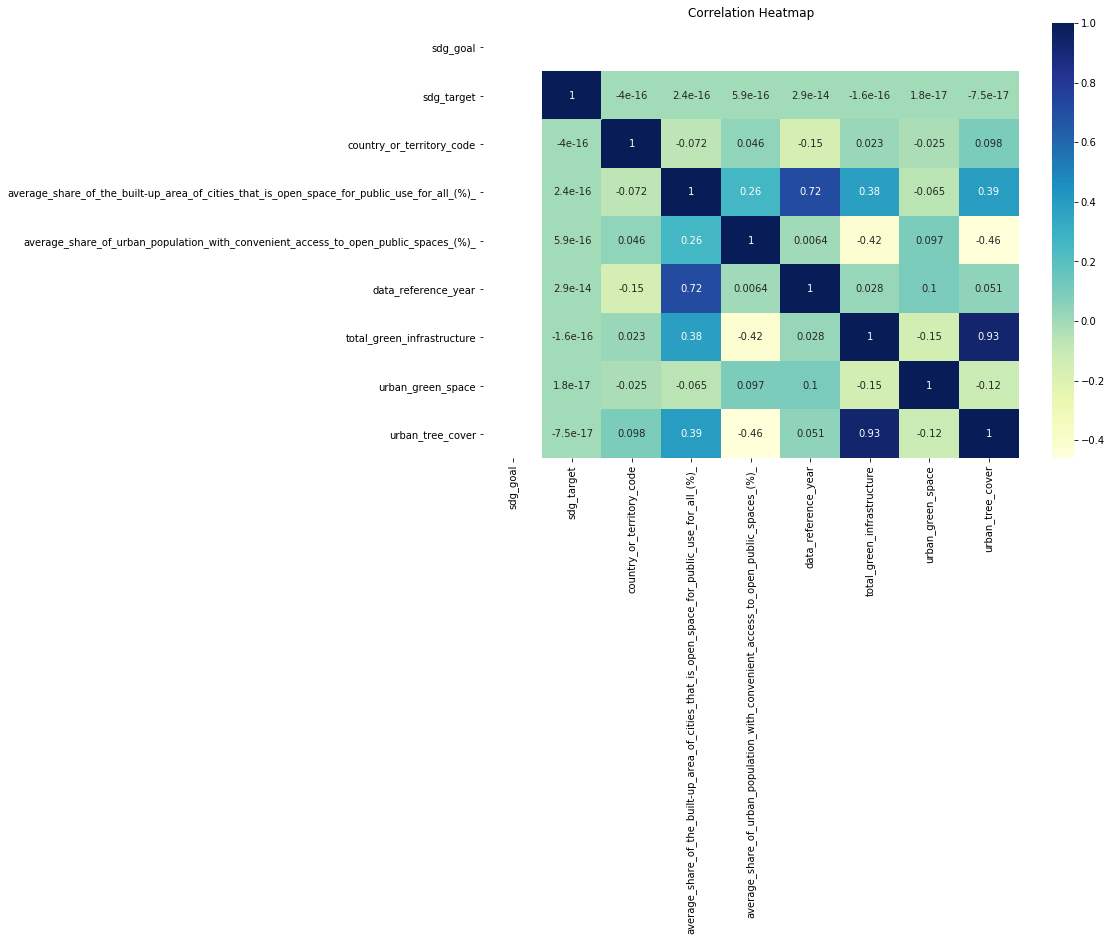

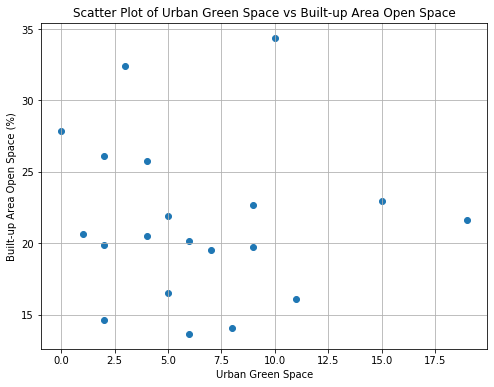

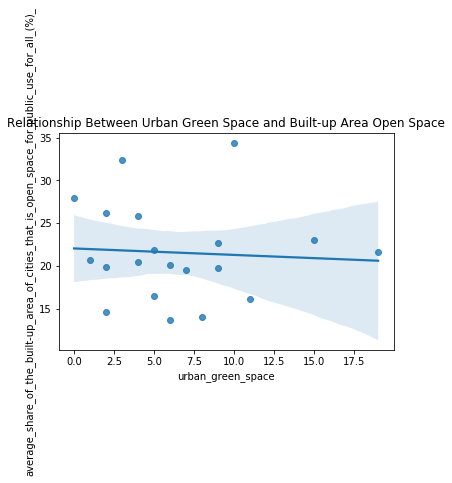

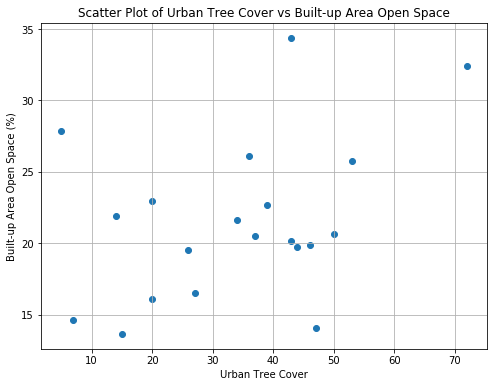

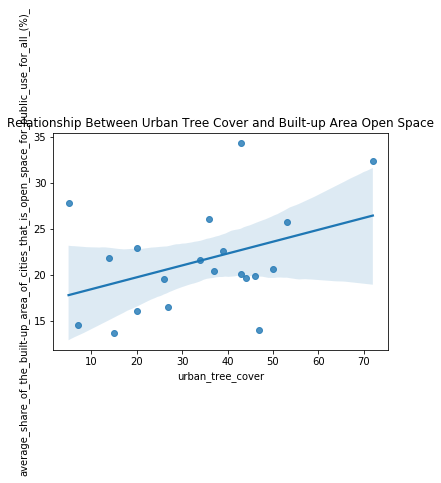

In [10]:
import pandas as pd
import sqlite3
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Paths for the new files
new_sdg_data_path = './SDG_11-7-1.xlsx'
new_green_infrastructure_data_path = './percentage-of-total-green-infrastructure.csv'

# Define the path for the SQLite database
base_dir = os.path.expanduser('~')
data_dir = os.path.join(base_dir, 'Documents', 'data')
os.makedirs(data_dir, exist_ok=True)
db_path = os.path.join(data_dir, 'combined_data.db')

# Function to transform data
def transform_data(df):
    df.columns = [col.strip().replace(" ", "_").replace(":text", "").replace(":number", "").lower() for col in df.columns]
    return df

# Check if the files exist before loading
if os.path.exists(new_sdg_data_path) and os.path.exists(new_green_infrastructure_data_path):
    # Load the data from the provided paths
    df_sdg = pd.read_excel(new_sdg_data_path)
    df_green_infrastructure = pd.read_csv(new_green_infrastructure_data_path)

    # Transforming data
    df_sdg = transform_data(df_sdg)
    df_green_infrastructure = transform_data(df_green_infrastructure)

    # Save to SQLite function
    def save_to_sqlite(df, db_path, table_name):
        conn = sqlite3.connect(db_path)
        df.to_sql(table_name, conn, if_exists='replace', index=False)
        conn.close()
        print(f"Saved data to SQLite database at {db_path} in table {table_name}")

    # Saving data to SQLite
    save_to_sqlite(df_sdg, db_path, 'sdg_data')
    save_to_sqlite(df_green_infrastructure, db_path, 'green_infrastructure')

    # Load the data from SQLite for analysis
    conn = sqlite3.connect(db_path)
    df_sdg = pd.read_sql_query("SELECT * FROM sdg_data", conn)
    df_green = pd.read_sql_query("SELECT * FROM green_infrastructure", conn)



    # Standardize the location column for consistency
    df_sdg['city_name'] = df_sdg['city_name'].str.strip().str.lower()
    df_green['city_name'] = df_green['city_name'].str.strip().str.lower()


    # Merge dataframes on common columns (e.g., city_name)
    df_merged = pd.merge(df_sdg, df_green, how='inner', on='city_name')




    # Calculate correlation
    corr_df = df_merged.corr()

    # Plotting Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_df, annot=True, cmap="YlGnBu")
    plt.title("Correlation Heatmap")
    plt.show()

    # Plotting Scatter Plots
    plt.figure(figsize=(8, 6))
    plt.scatter(df_merged['urban_green_space'], df_merged['average_share_of_the_built-up_area_of_cities_that_is_open_space_for_public_use_for_all_(%)_'])
    plt.title('Scatter Plot of Urban Green Space vs Built-up Area Open Space')
    plt.xlabel('Urban Green Space')
    plt.ylabel('Built-up Area Open Space (%)')
    plt.grid(True)
    plt.show()

    sns.regplot(x="urban_green_space", y="average_share_of_the_built-up_area_of_cities_that_is_open_space_for_public_use_for_all_(%)_", data=df_merged)
    plt.title("Relationship Between Urban Green Space and Built-up Area Open Space")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(df_merged['urban_tree_cover'], df_merged['average_share_of_the_built-up_area_of_cities_that_is_open_space_for_public_use_for_all_(%)_'])
    plt.title('Scatter Plot of Urban Tree Cover vs Built-up Area Open Space')
    plt.xlabel('Urban Tree Cover')
    plt.ylabel('Built-up Area Open Space (%)')
    plt.grid(True)
    plt.show()

    sns.regplot(x="urban_tree_cover", y="average_share_of_the_built-up_area_of_cities_that_is_open_space_for_public_use_for_all_(%)_", data=df_merged)
    plt.title("Relationship Between Urban Tree Cover and Built-up Area Open Space")
    plt.show()
else:
    print("One or both files do not exist. Please check the file paths and try again.")
